#  Potato Plant Diseases Data 🍂🍂🍂🌱🌱🌱🥔🥔🥔

Potato Plant Diseases Detection Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


Data Preprocessing

In [2]:
# Defining variables
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS = 50
CHANNELS = 3

In [3]:
# Retrieve images and divide into three classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\PC\Documents\Data-Science-Tasks\ML-Image-Classification\Potato Image Classification\PlantVillage',
                                                              shuffle = True,
                                                              image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Data Visualizations

(32, 256, 256, 3)
[0 0 0 0 1 0 2 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 2 1 1 1 1 0 1]


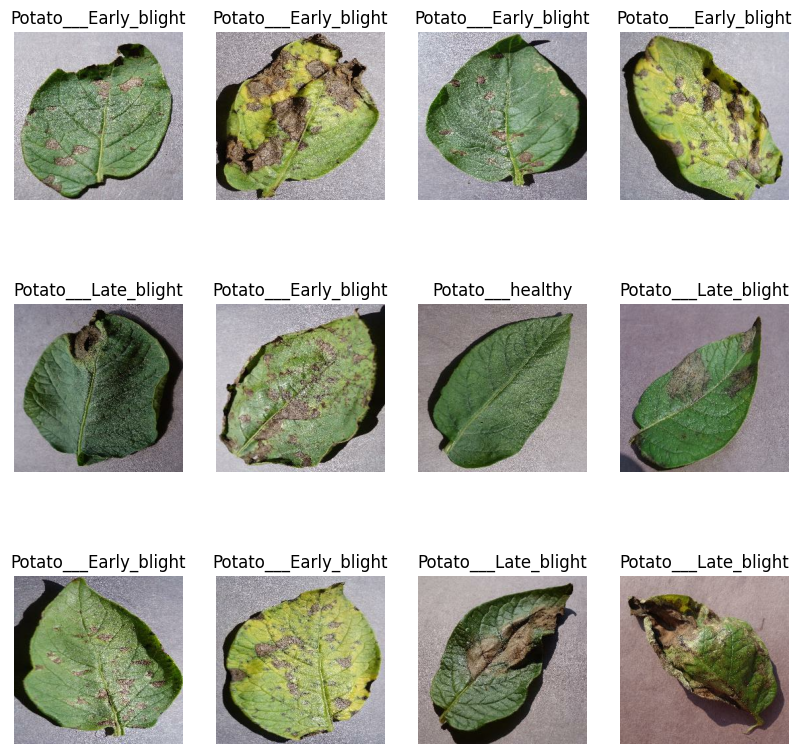

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy().shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

Train Test Split

In [6]:
# Convert data into train test split
# 80% training 10% validation 10% Testing
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [9]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [10]:
val_ds = train_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

Splitting Using Functions

In [12]:
#function that returns train, validation and test split
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(val_ds)

6

Cache, Shuffle, Prefetch

In [15]:
# Performing cache, shuffle, prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy())

[[[[186. 184. 195.]
   [188. 186. 197.]
   [189. 187. 198.]
   ...
   [202. 200. 211.]
   [201. 199. 210.]
   [198. 196. 207.]]

  [[187. 185. 196.]
   [188. 186. 197.]
   [188. 186. 197.]
   ...
   [202. 200. 211.]
   [200. 198. 209.]
   [197. 195. 206.]]

  [[182. 180. 191.]
   [182. 180. 191.]
   [182. 180. 191.]
   ...
   [199. 197. 208.]
   [197. 195. 206.]
   [195. 193. 204.]]

  ...

  [[155. 152. 161.]
   [156. 153. 162.]
   [154. 151. 160.]
   ...
   [155. 149. 161.]
   [147. 141. 153.]
   [151. 145. 157.]]

  [[151. 148. 157.]
   [149. 146. 155.]
   [144. 141. 150.]
   ...
   [159. 153. 165.]
   [154. 148. 160.]
   [167. 161. 173.]]

  [[165. 162. 171.]
   [150. 147. 156.]
   [135. 132. 141.]
   ...
   [157. 151. 163.]
   [157. 151. 163.]
   [175. 169. 181.]]]


 [[[112. 106. 116.]
   [100.  94. 104.]
   [107. 101. 111.]
   ...
   [103.  97. 109.]
   [109. 103. 115.]
   [116. 110. 122.]]

  [[116. 110. 120.]
   [112. 106. 116.]
   [118. 112. 122.]
   ...
   [112. 106. 118.]
 

Preprocessing During Model Creation

In [17]:
#Preprocessing during model creation Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

Data Augmentation

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

Model Creation

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.build(input_shape = input_shape)

Model Summary

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,219 (1.13 MB)

 Trainable params: 297,219 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

Training The Model

In [23]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 451s 7s/step - accuracy: 0.4547 - loss: 0.9331 - val_accuracy: 0.7344 - val_loss: 0.7844
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.7808 - loss: 0.5418 - val_accuracy: 0.7812 - val_loss: 0.6033
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.8811 - loss: 0.3087 - val_accuracy: 0.9115 - val_loss: 0.2356
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.9023 - loss: 0.2536 - val_accuracy: 0.8698 - val_loss: 0.3566
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.9385 - loss: 0.1616 - val_accuracy: 0.9271 - val_loss: 0.1740
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9362 - loss: 0.1650 - val_accuracy: 0.9375 - val_loss: 0.1733
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9397 - loss: 0.1475 - val_accuracy: 0.9219 - val_loss: 0.1959
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9332 - loss: 0.1595 - val_accuracy: 0.9375 - v

Accuracy

In [24]:
score = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 864ms/step - accuracy: 1.0000 - loss: 0.0023


In [25]:
score

[0.0026896772906184196, 1.0]

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Training History

In [27]:
history.history['accuracy']

[0.5133101940155029,
 0.8067129850387573,
 0.8825231194496155,
 0.9091435074806213,
 0.9311342835426331,
 0.9340277910232544,
 0.9328703880310059,
 0.9398148059844971,
 0.9311342835426331,
 0.9583333134651184,
 0.9565972089767456,
 0.9577546119689941,
 0.9571759104728699,
 0.9623842835426331,
 0.9670138955116272,
 0.9820601940155029,
 0.9681712985038757,
 0.9785879850387573,
 0.9658564925193787,
 0.9670138955116272,
 0.9716435074806213,
 0.9855324029922485,
 0.9832175970077515,
 0.9785879850387573,
 0.9849537014961243,
 0.9780092835426331,
 0.9901620149612427,
 0.9884259104728699,
 0.9849537014961243,
 0.984375,
 0.9878472089767456,
 0.9907407164573669,
 0.9820601940155029,
 0.9803240895271301,
 0.96875,
 0.9913194179534912,
 0.9924768805503845,
 0.9947916865348816,
 0.9837962985038757,
 0.9699074029922485,
 0.9814814925193787,
 0.9890046119689941,
 0.9942129850387573,
 0.9913194179534912,
 0.9953703880310059,
 0.9947916865348816,
 0.9878472089767456,
 0.9797453880310059,
 0.9924768805

In [28]:
history.history['loss'][:5]

[0.8766853213310242,
 0.48316287994384766,
 0.3139795660972595,
 0.2355237901210785,
 0.17217618227005005]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Graphical Representation of Accuracy

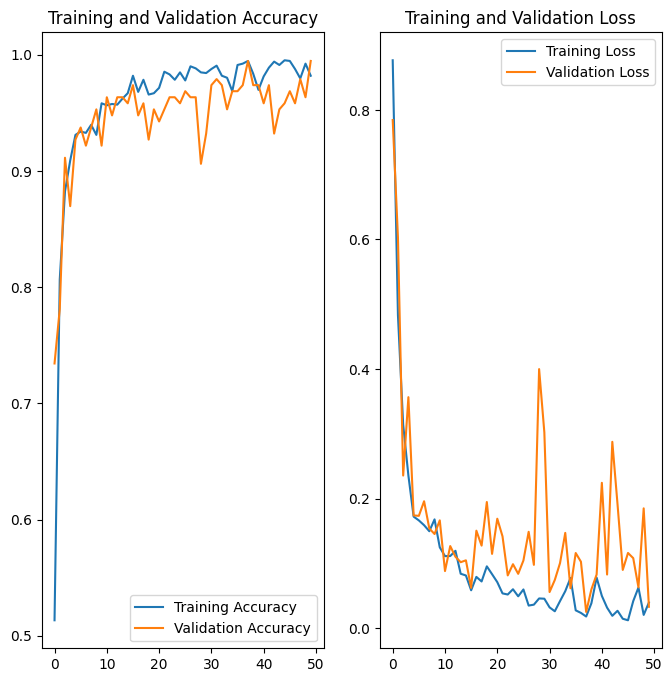

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()